## DBSCAN

(Density-Based Spatial Clustering of Applications with Noise)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
SEED = np.random.seed(42)

In [9]:
def PointinCircle(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [14]:
points1 =PointinCircle(500,1000)
points2 =PointinCircle(300,700)
points3 = PointinCircle(100,300)

df1 = pd.DataFrame(points1)
df2 = pd.DataFrame(points2)
df3 = pd.DataFrame(points3)
df = pd.concat([df1, df2, df3], ignore_index=True)

In [15]:
df

,0,1
0,449.635289,-36.023412
1,452.039090,-20.404439
2,505.826532,-43.707045
3,499.866710,-40.885114
4,444.324464,10.263218
...,...,...
1995,30.905619,-73.487660
1996,87.662371,-78.454843
1997,60.975423,-15.638886
1998,82.477840,-43.661011


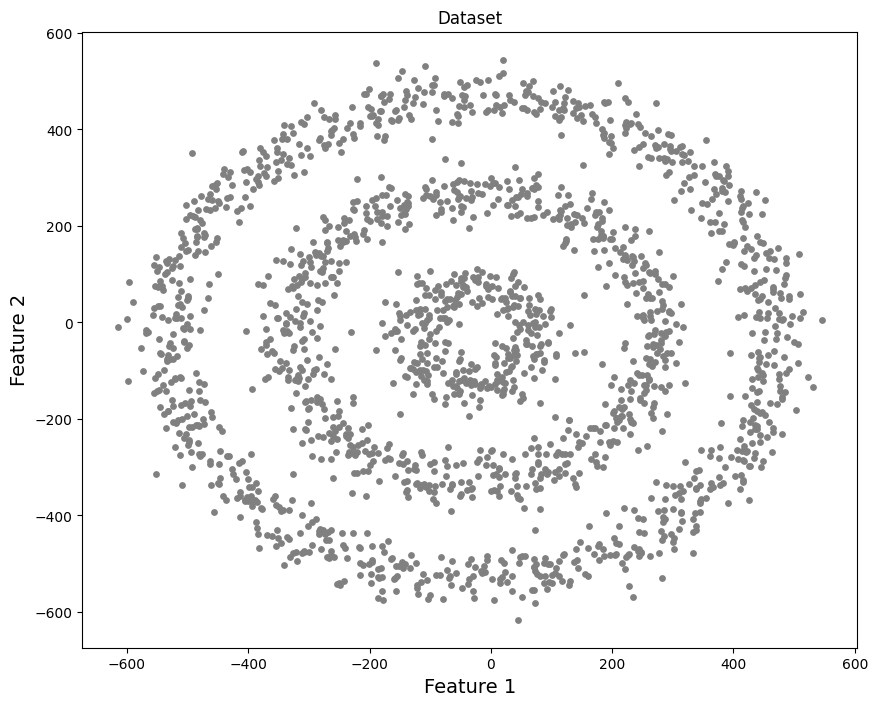

In [23]:
plt.figure(figsize=(10,8))
plt.title("Dataset")
plt.scatter(df[0],df[1],s=15,c='grey')
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Here we compare KMeans,Hierarchical and DBSCAN clustring

In [37]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from matplotlib.colors import ListedColormap

## KMeans

In [27]:
kMeans = KMeans(n_clusters=4,random_state=42)
kMeans.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

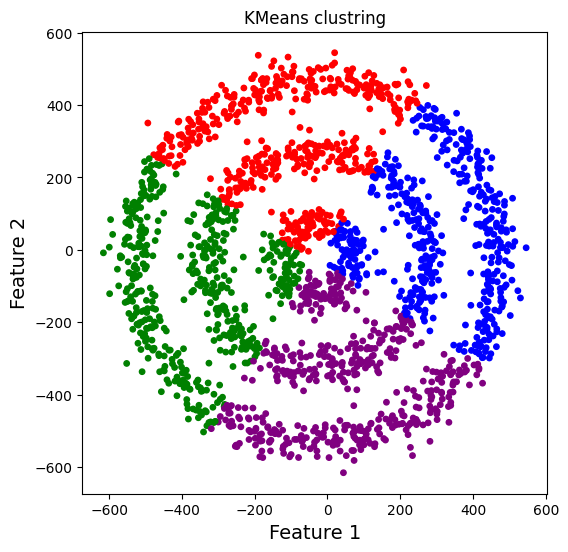

In [45]:
df['Kmeans labels'] = kMeans.labels_

colors = ['purple','red','blue','green']
plt.figure(figsize=(6,6))
plt.title('KMeans clustring')
plt.scatter(df[0],df[1],c=df['Kmeans labels'],cmap=ListedColormap(colors),s=15)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Hierarchical

In [40]:
model = AgglomerativeClustering(n_clusters=4,metric='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

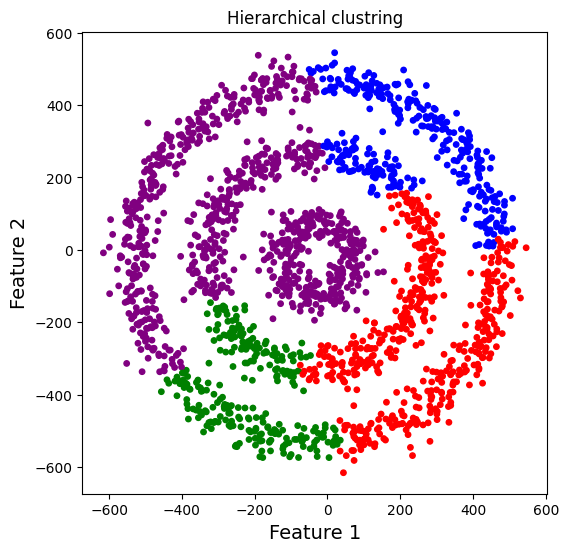

In [44]:
df['Hierarchical labels'] = model.labels_

colors = ['purple','red','blue','green']
plt.figure(figsize=(6,6))
plt.title('Hierarchical clustring')
plt.scatter(df[0],df[1],c=df['Hierarchical labels'],cmap=ListedColormap(colors),s=15)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [47]:
scan = DBSCAN()
scan.fit(df[[0,1]])

DBSCAN()

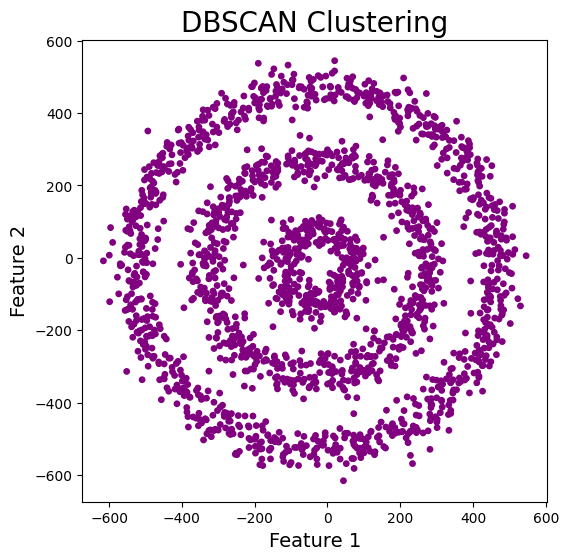

In [82]:
df['DBSCAN_labels'] = scan.labels_
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=ListedColormap(colors),s=15) 
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [54]:
from sklearn.neighbors import NearestNeighbors

In [67]:
negh = NearestNeighbors(n_neighbors=2)
negh.fit(df[[0,1]])

NearestNeighbors(n_neighbors=2)

In [76]:
distances, indices = negh.kneighbors(df[[0, 1]])
indicas

array([[   0,    1],
       [   1,    0],
       [   2,    3],
       ...,
       [1997, 1735],
       [1998, 1991],
       [1999, 1735]])

In [77]:
distance

array([ 0.2185583 ,  0.2185583 ,  0.38393901, ..., 48.69091293,
       49.19016192, 61.8339456 ])

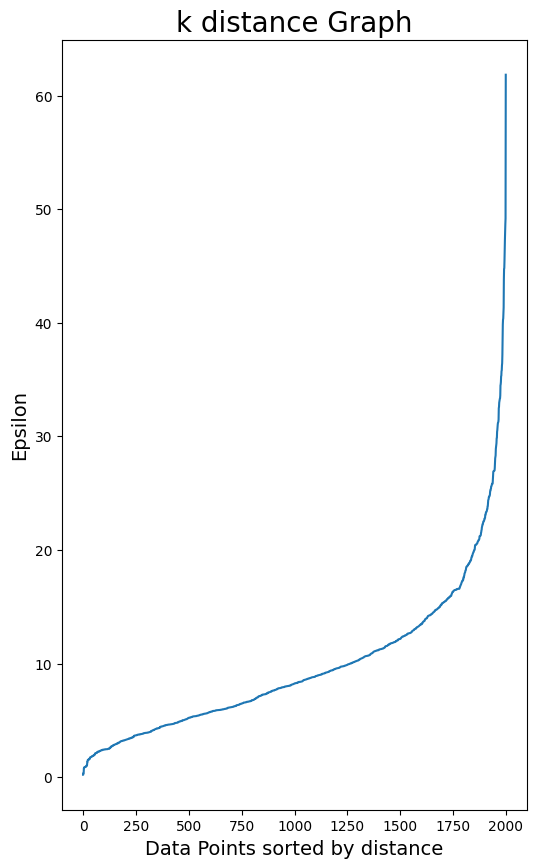

In [78]:
distances = np.sort(distances[:, 1], axis=0)  # Sort only the second column of distances
plt.figure(figsize=(6, 10))
plt.plot(distances)
plt.title('k distance Graph', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [80]:
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

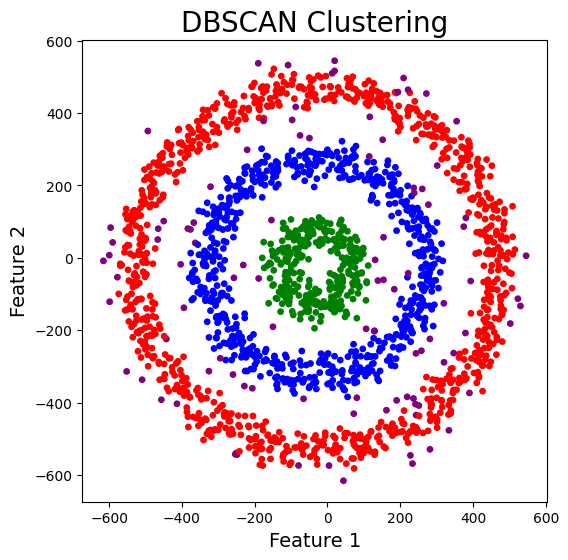

In [85]:
df['DBSCAN_opt_labels'] = dbscan_opt.labels_
plt.figure(figsize=(6,6))
colors = ['purple','red','blue','green']
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()